In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.utils.data.dataloader as dataloader

In [ ]:
import torchvision.datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def show(x, new_fig=True):
    grid = vutils.make_grid(x.detach().cpu(), nrow=8, normalize=True, pad_value=0.3)
    grid = grid.transpose(0,2).transpose(0,1) # channels as last dimension
    if new_fig:
        plt.figure()
    plt.imshow(grid.numpy())

In [ ]:
a = torch.ones(3,3)
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
b = torch.arange(9).float().view(3,3)
b

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [ ]:
b[:,1]

tensor([1., 4., 7.])

In [ ]:
a.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
a.size(0)

3

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, inp_dim=784):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(inp_dim, 128)
        self.non_lin1 = nn.LeakyReLU(0.2)
        self.fc2 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.non_lin1(x)
        x = self.fc2(x)
        return torch.sigmoid(x)
    
        

In [ ]:
class Generator(nn.Module):
    def __init__(self, zdim=100) -> None:
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(zdim, 128)
        self.nonlin1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 784)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.nonlin1(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        out = x.view(x.size(0), 1, 28, 28)
        return out
        
        

In [ ]:
# instantiate a Generator and Discriminator according to their class definition.
D = Discriminator()
print(D)
G = Generator()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (non_lin1): LeakyReLU(negative_slope=0.2)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)
Generator(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (nonlin1): ReLU()
  (fc2): Linear(in_features=128, out_features=784, bias=True)
)


In [ ]:
# A small batch of 3 samples, all zeros.
samples = torch.randn(5, 1, 28, 28) # batch size x channels x width x height
# This is how to do a forward pass (calls the .forward() function under the hood)
D(samples)

tensor([[-0.3451],
        [-0.2059],
        [-0.1398],
        [-0.5206],
        [ 0.1101]], grad_fn=<AddmmBackward0>)

In [ ]:
# A small batch of 2 samples, random noise.
z = torch.randn(2, 100)
# This is how to do a forward pass (calls the .forward() function under the hood)
x_gen = G(z)
x_gen.shape

torch.Size([2, 1, 28, 28])

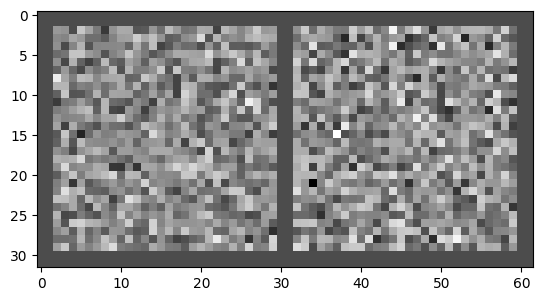

In [ ]:
z = torch.randn(2, 100)
show(G(z))

In [ ]:
dataset = torchvision.datasets.FashionMNIST(root='.', download=True, transform=transforms.Compose([transforms.ToTensor(),
                                                     transforms.Normalize((0.5,), (0.5,))]))

dataloader = dataloader.DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True)

AttributeError: 'DataLoader' object has no attribute 'DataLoader'

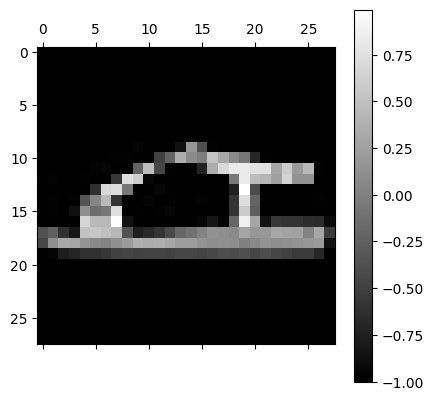

In [ ]:
ix=120
x, _ = dataset[ix]
plt.matshow(x.squeeze().numpy(), cmap=plt.cm.gray)
plt.colorbar()

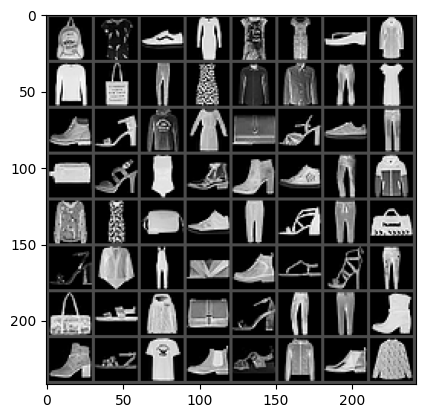

In [ ]:
# How you can get a batch of images from the dataloader:
xbatch, _ = next(iter(dataloader)) # 64 x 1 x 28 x 28: minibatch of 64 samples
#D(xbatch) # 64x1 tensor: 64 predictions of "real" probability
xbatch.shape
# D(xbatch).shape
show(xbatch)

In [ ]:
for p in G.parameters():
    print(p, p.requires_grad)

Parameter containing:
tensor([[-0.0491,  0.0857,  0.0625,  ...,  0.0260, -0.0016, -0.0728],
        [ 0.0985,  0.0370,  0.0983,  ..., -0.0605,  0.0647,  0.0515],
        [-0.0489, -0.0815,  0.0748,  ...,  0.0671,  0.0330,  0.0982],
        ...,
        [ 0.0864,  0.0811,  0.0343,  ...,  0.0566, -0.0367, -0.0612],
        [ 0.0255, -0.0183, -0.0948,  ..., -0.0841,  0.0608, -0.0415],
        [ 0.0523,  0.0517,  0.0241,  ..., -0.0075, -0.0787, -0.0517]],
       requires_grad=True) True
Parameter containing:
tensor([ 0.0454, -0.0553, -0.0117,  0.0779,  0.0968,  0.0799,  0.0329, -0.0069,
        -0.0333,  0.0369,  0.0170,  0.0372,  0.0857,  0.0141,  0.0703, -0.0408,
        -0.0696, -0.0960, -0.0077, -0.0934,  0.0739,  0.0847,  0.0819,  0.0113,
        -0.0116,  0.0120, -0.0678,  0.0374,  0.0095, -0.0300, -0.0191, -0.0667,
         0.0600,  0.0954, -0.0227,  0.0752, -0.0434,  0.0569,  0.0115,  0.0065,
         0.0117, -0.0617, -0.0004, -0.0313, -0.0264,  0.0996, -0.0157, -0.0851,
        -0

Device:  cpu
e0.i0/938 last mb D(x)=0.4340 D(G(z))=0.4863
e0.i100/938 last mb D(x)=0.8258 D(G(z))=0.5019
e0.i200/938 last mb D(x)=0.8382 D(G(z))=0.3015
e0.i300/938 last mb D(x)=0.8782 D(G(z))=0.1822
e0.i400/938 last mb D(x)=0.8619 D(G(z))=0.2249
e0.i500/938 last mb D(x)=0.8903 D(G(z))=0.2107
e0.i600/938 last mb D(x)=0.8058 D(G(z))=0.3038
e0.i700/938 last mb D(x)=0.8931 D(G(z))=0.2273
e0.i800/938 last mb D(x)=0.9052 D(G(z))=0.1958
e0.i900/938 last mb D(x)=0.9365 D(G(z))=0.2021
e1.i0/938 last mb D(x)=0.9069 D(G(z))=0.1592
e1.i100/938 last mb D(x)=0.8969 D(G(z))=0.2232
e1.i200/938 last mb D(x)=0.8638 D(G(z))=0.2660
e1.i300/938 last mb D(x)=0.8530 D(G(z))=0.2868
e1.i400/938 last mb D(x)=0.8758 D(G(z))=0.2364
e1.i500/938 last mb D(x)=0.8723 D(G(z))=0.1962
e1.i600/938 last mb D(x)=0.8993 D(G(z))=0.1322
e1.i700/938 last mb D(x)=0.8915 D(G(z))=0.1504
e1.i800/938 last mb D(x)=0.8004 D(G(z))=0.2657
e1.i900/938 last mb D(x)=0.7952 D(G(z))=0.3468
e2.i0/938 last mb D(x)=0.7830 D(G(z))=0.2341
e2.i10

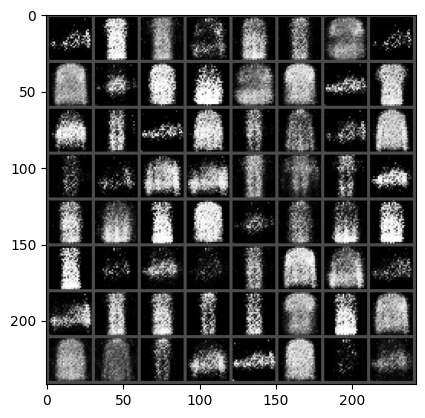

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('Device: ', device)
# Re-initialize D, G:
D = Discriminator().to(device)
G = Generator().to(device)
# Now let's set up the optimizers (Adam, better than SGD for this)
# optimizerD = torch.optim.Adam(D.parameters(), lr=0.03)
# optimizerG = torch.optim.Adam(G.parameters(), lr=0.03)
optimizerD = torch.optim.Adam(D.parameters(), lr=0.0002)
optimizerG = torch.optim.Adam(G.parameters(), lr=0.0002)
lab_real = torch.ones(64, 1, device=device)
lab_fake = torch.zeros(64, 1, device=device)
criterion = nn.BCELoss()


# for logging:
collect_x_gen = []
fixed_noise = torch.randn(64, 100, device=device)
fig = plt.figure() # keep updating this one
plt.ion()

for epoch in range(10): # 10 epochs
    for i, data in enumerate(dataloader, 0):
        # STEP 1: Discriminator optimization step
        x_real, _ = next(iter(dataloader))
        x_real = x_real.to(device)
        # reset accumulated gradients from previous iteration
        optimizerD.zero_grad()

        D_x = D(x_real)
        lossD_real = criterion(D_x, lab_real)

        z = torch.randn(64, 100, device=device) # random noise, 64 samples, z_dim=100
        x_gen = G(z).detach()
        D_G_z = D(x_gen)
        lossD_fake = criterion(D_G_z, lab_fake)

        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()
        
        # STEP 2: Generator optimization step
        # reset accumulated gradients from previous iteration
        optimizerG.zero_grad()

        z = torch.randn(64, 100, device=device) # random noise, 64 samples, z_dim=100
        x_gen = G(z)
        D_G_z = D(x_gen)
        lossG = criterion(D_G_z, lab_real) # -log D(G(z))

        lossG.backward()
        optimizerG.step()
        if i % 100 == 0:
            x_gen = G(fixed_noise)
            show(x_gen, new_fig=False)
            fig.canvas.draw()
            print('e{}.i{}/{} last mb D(x)={:.4f} D(G(z))={:.4f}'.format(
                epoch, i, len(dataloader), D_x.mean().item(), D_G_z.mean().item()))
    # End of epoch
    x_gen = G(fixed_noise)
    collect_x_gen.append(x_gen.detach().clone())
        

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('Device: ', device)
# Re-initialize D, G:
D = Discriminator().to(device)
G = Generator().to(device)
# Now let's set up the optimizers (Adam, better than SGD for this)
# optimizerD = torch.optim.Adam(D.parameters(), lr=0.03)
# optimizerG = torch.optim.Adam(G.parameters(), lr=0.03)
optimizerD = torch.optim.Adam(D.parameters(), lr=0.0002)
optimizerG = torch.optim.Adam(G.parameters(), lr=0.0002)
lab_real = torch.ones(64, 1, device=device)
lab_fake = torch.zeros(64, 1, device=device)
criterion = nn.BCELoss()

# for logging:
collect_x_gen = []
fixed_noise = torch.randn(64, 100, device=device)
fig = plt.figure() # keep updating this one
plt.ion()

Device:  cpu


<Figure size 640x480 with 0 Axes>

TypeError: new() received an invalid combination of arguments - got (list, requires_grad=bool), but expected one of:
 * (*, torch.device device)
      didn't match because some of the keywords were incorrect: requires_grad
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device)
 * (object data, *, torch.device device)


In [ ]:
from torch.autograd import Variable

In [ ]:
def gradient_penalty(real_data, generated_data):
    batch_size = real_data.size()[0]

    # Calculate interpolation
    alpha = torch.rand(batch_size, 1, 1, 1)
    alpha = alpha.expand_as(real_data).to(device)
    interpolated = alpha * real_data.data + (1 - alpha) * generated_data.data
    interpolated = torch.FloatTensor(interpolated, require_grad=True).to(device)
    interpolated = Variable(interpolated, requires_grad=True)
    # Calculate probability of interpolated examples
    prob_interpolated = D(interpolated)

    # Calculate gradients of probabilities with respect to examples
    gradients = torch_grad(outputs=prob_interpolated, inputs=interpolated,
                            grad_outputs=torch.ones(prob_interpolated.size()).cuda() if self.use_cuda else torch.ones(
                            prob_interpolated.size()),
                            create_graph=True, retain_graph=True)[0]

    # Gradients have shape (batch_size, num_channels, img_width, img_height),
    # so flatten to easily take norm per example in batch
    gradients = gradients.view(batch_size, -1)
    self.losses['gradient_norm'].append(gradients.norm(2, dim=1).mean().data[0])

    # Derivatives of the gradient close to 0 can cause problems because of
    # the square root, so manually calculate norm and add epsilon
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1) + 1e-12)

    # Return gradient penalty
    return self.gp_weight * ((gradients_norm - 1) ** 2).mean()

e0.i0/938 last mb D(x)=0.5248 D(G(z))=0.5228
e0.i100/938 last mb D(x)=0.5193 D(G(z))=0.4570
e0.i200/938 last mb D(x)=0.5371 D(G(z))=0.4377
e0.i300/938 last mb D(x)=0.5484 D(G(z))=0.4234
e0.i400/938 last mb D(x)=0.5603 D(G(z))=0.4187
e0.i500/938 last mb D(x)=0.5668 D(G(z))=0.4114
e0.i600/938 last mb D(x)=0.5655 D(G(z))=0.3973
e0.i700/938 last mb D(x)=0.5770 D(G(z))=0.3989
e0.i800/938 last mb D(x)=0.5828 D(G(z))=0.3963
e0.i900/938 last mb D(x)=0.5743 D(G(z))=0.3906
e1.i0/938 last mb D(x)=0.5757 D(G(z))=0.3855
e1.i100/938 last mb D(x)=0.5900 D(G(z))=0.3879
e1.i200/938 last mb D(x)=0.5849 D(G(z))=0.3844
e1.i300/938 last mb D(x)=0.5827 D(G(z))=0.3857
e1.i400/938 last mb D(x)=0.5877 D(G(z))=0.3810
e1.i500/938 last mb D(x)=0.5877 D(G(z))=0.3848
e1.i600/938 last mb D(x)=0.5819 D(G(z))=0.3870
e1.i700/938 last mb D(x)=0.5896 D(G(z))=0.3883
e1.i800/938 last mb D(x)=0.5872 D(G(z))=0.3883
e1.i900/938 last mb D(x)=0.5913 D(G(z))=0.3910
e2.i0/938 last mb D(x)=0.5923 D(G(z))=0.3935
e2.i100/938 last mb

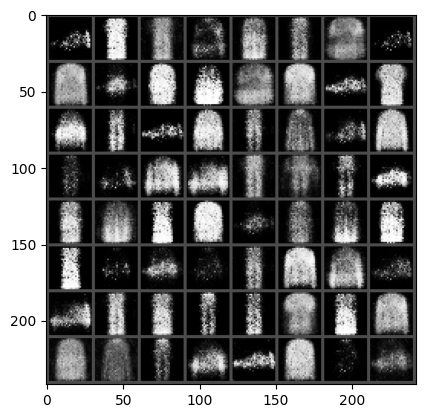

In [ ]:
for epoch in range(3):
    buffer = []
    for i, data in enumerate(dataloader):
        
        x_real, _ = data
        x_real = x_real.to(device)
        optimizerD.zero_grad()
        for p in D.parameters():
            p.data.clamp_(-0.01, 0.01)
        D_x = D(x_real)
        lossD_real = criterion(D_x, torch.ones_like(D_x, device=device))
        
        z = torch.randn(64,100, device=device)
        x_gen = G(z)
        buffer.append(x_gen.clone())
        x_gen = x_gen.detach()
        D_G_z = D(x_gen)
        lossD_fake = criterion(D_G_z, lab_fake)
        
        
        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()
        
        # STEP 2: Generator optimization step
        # reset accumulated gradients from previous iteration
        if i % 4 ==0:
            optimizerG.zero_grad()
            # z = torch.randn(64*len(buffer), 100, device=device) # random noise, 64 samples, z_dim=100
            x_gen_aggregated = torch.cat(buffer, dim=0)
            # x_gen = G(z)
            D_G_z = D(x_gen_aggregated)
            lossG = criterion(D_G_z, torch.ones(64*len(buffer), 1, device=device)) # -log D(G(z))

            lossG.backward()
            optimizerG.step()
            buffer = []
            
        if i % 100 == 0:
            x_gen = G(fixed_noise)
            show(x_gen, new_fig=False)
            fig.canvas.draw()
            print('e{}.i{}/{} last mb D(x)={:.4f} D(G(z))={:.4f}'.format(
                epoch, i, len(dataloader), D_x.mean().item(), D_G_z.mean().item()))
    # End of epoch
        
        
        
        
        